<a href="https://colab.research.google.com/github/HamsalekhaYerra/Hamsalekha_INFO_5731_Spring2022/blob/main/INFO5731_Assignment_Three_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets). 


# Count the frequency of all the N-grams (N=3).

In [18]:
!pip install panda

In [19]:
!pip install requests

In [20]:
import nltk
nltk.download('punkt') 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import nltk
import pandas as pd
#import request
#path = "/content/drive/MyDrive/apple_iphone_11_reviews.xls"
#f = pd.read_csv(path)
# Dataset is now stored in a Pandas Dataframe
f = open("/content/drive/MyDrive/apple_iphone_11_reviews_xls.xls",encoding = "ISO-8859-1")
d = f.read()
def preprocess(d):
    d=d.lower()
    d="eos "+ d
    d=d.replace("."," eos")
    return d
d=preprocess(d)
print("Preprocessed Data corpus = \n",d)
from nltk import word_tokenize
def generate_tokens(d):
    tokens = word_tokenize(d)
    return tokens
tokens=generate_tokens(d)
distinct_tokens = list(set(sorted(tokens)))
print("Tokens in the corpus = \n",distinct_tokens)
def generate_tokens_freq(tokens):
    dct={}
    for i in tokens:
        dct[i]=0
    for i in tokens:
        dct[i]+=1
    return dct
dct=generate_tokens_freq(tokens)
print("Frequency of each tokens = ")
for i in dct.items():
    print(i[0],"\t:" , i[1])
def generate_ngrams(tokens,k):
    l=[]
    i=0
    while(i<len(tokens)):
        l.append(tokens[i:i+k])
        i=i+1
    l=l[:-1]
    return l
trigram = generate_ngrams(tokens,3)
print("N-grams generated (Here n is 3) = ")
for i in trigram:
    print(i)
def generate_ngram_freq(trigram):
    dct1={}
    for i in trigram:
        st=" ".join(i)
        dct1[st]=0
    for i in trigram:
        st=" ".join(i)
        dct1[st]+=1
    return dct1
dct1=generate_ngram_freq(trigram)
print("Frequency of n-grams = ")
for i in dct1.items():
    print(i[0], ":", i[1])
    
    
bigram = generate_ngrams(tokens,2)
print("N-grams generated (Here n is 2) = ")
for i in bigram:
    print(i)
#count(w2 w1) / count(w2)
#count(v k) / count(v)

Streaming output truncated to the last 5000 lines.
['5', 'stars']
['stars', 'amazing']
['amazing', 'battery']
['battery', 'life,5']
['life,5', 'eos0']
['eos0', 'out']
['out', 'of']
['of', '5']
['5', 'stars']
['stars', 'battery']
['battery', 'life']
['life', 'so']
['so', 'good,5']
['good,5', 'eos0']
['eos0', 'out']
['out', 'of']
['of', '5']
['5', 'stars']
['stars', 'superd']
['superd', 'mobaile']
['mobaile', 'phone,5']
['phone,5', 'eos0']
['eos0', 'out']
['out', 'of']
['of', '5']
['5', 'stars']
['stars', 'performance']
['performance', 'beast']
['beast', 'â\x99¥ï¸\x8f,5']
['â\x99¥ï¸\x8f,5', 'eos0']
['eos0', 'out']
['out', 'of']
['of', '5']
['5', 'stars']
['stars', 'awesome']
['awesome', 'battery']
['battery', 'life,5']
['life,5', 'eos0']
['eos0', 'out']
['out', 'of']
['of', '5']
['5', 'stars']
['stars', 'superb']
['superb', 'mobile']
['mobile', 'to']
['to', 'use,5']
['use,5', 'eos0']
['eos0', 'out']
['out', 'of']
['of', '5']
['5', 'stars']
['stars', 'good']
['good', 'but']
['but', 'but']

# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program: 

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [26]:
import pandas as pd
import numpy as np
#df = pd.read_csv('./dataset/ted.csv')

f = pd.read_csv('/content/drive/MyDrive/apple_iphone_11_reviews_csv.csv')
#data = f.read()
f.head()
ted = f['review_text,review_rating']
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Generate matrix of word vectors
tfidf_matrix = vectorizer.fit_transform(ted)

# Print the shape of tfidf_matrix
print(tfidf_matrix.shape)

#Cosine Similarity
A = np.array([1, 3])
B = np.array([-2, 2])

# Compute dot product
dot_prod = np.dot(A, B)

# Print dot product
print(dot_prod)

# "An Outstanding movie with a haunting performance and best character development" example
corpus=['The sun is the largest celestial body in the solar system', 
          'The solar system consists of the sun and eight revolving planets',   
          'The quick brown fox jumps over the lazy dog']

from sklearn.metrics.pairwise import cosine_similarity

# Initialize an instance of tf-idf Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Generate the tf-idf vectors for the corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# compute and print the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(cosine_sim)

(5010, 3977)
4
[[1.         0.4031644  0.22987023]
 [0.4031644  1.         0.15936933]
 [0.22987023 0.15936933 1.        ]]


# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model: 

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Streaming output truncated to the last 5000 lines.
i was delivered a phone that did not work immediately after removing from the box eos i was not able to return it as i need to first check with apple eos apple service told me that the phone was lying without charge since 5 months and hence the battery failed eos now i have had to leave the phone with apple for repairs and waiting for them to replace the battery eos please answer this: why should i run around for the sub par quality device when i was shipped a dead phone? last time i ever purchase a phone online,1 eos0 out of 5 stars
"it has been a month since i started using my iphone xr and the experience has been awesome eos excellent battery life, smooth operating system, and most of all, dual sim functionality are the best features of this iphone eos spent so many days to decide on the colour, but opted for white, and iâm very happy about it eos coral is also a very good colour option which i have bought for my wife eos only iss

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


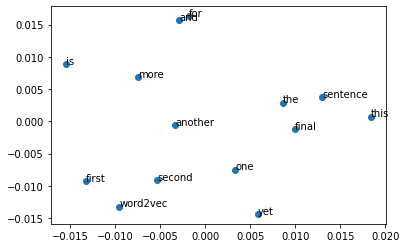

In [23]:
import gensim
from gensim.models import Word2Vec
import nltk
f = open('/content/drive/MyDrive/apple_iphone_11_reviews_xls.xls',encoding = "ISO-8859-1")
d = f.read()
def preprocess(d):
    d=d.lower()
    d="eos "+ d
    d=d.replace("."," eos")
    return d
d=preprocess(d)
print("Preprocessed Data corpus = \n",d)
from nltk import word_tokenize
def generate_tokens(d):
    tokens = word_tokenize(d)
    return tokens
tokens=generate_tokens(d)
distinct_tokens = list(set(sorted(tokens)))
print("Tokens in the corpus = \n",distinct_tokens)
# define training data
sentences = tokens
# train model
#model = Word2Vec(sentences, vector_size=300)
model1 = gensim.models.Word2Vec(sentences, min_count = 1, 
                              size = 300, window = 5)
# summarize the loaded model
print(model1)
# summarize vocabulary
words = list(model1.wv.vocab)
print(words)
# access vector for one word
#print(model1['sentence'])
# save model
model1.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
#print(new_model)

from sklearn.decomposition import PCA
from matplotlib import pyplot
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()


# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification. 


In [ ]:
# Link
https://github.com/HamsalekhaYerra/Hamsalekha_INFO_5731_Spring2022/blob/main/data%20and%20sentiments.xlsx



